<h2 align="right">Group 11</h2> 
<h2 align="left">Domain : Entertainment</h2> 
<h4 align="right">Team Members : </h4>
<h5 align="right">Revathy</h5>
<h5 align="right">Siby</h5>
<h5 align="right">Thasneem</h5>
<h5 align="right">Vipin</h5>
<h1 align="center"></h1><br/>
<h1 align="center">Forecasting Box–Office Revenues.</h1><br/>
<h2 align="center"> A case study on Box-Office 2017_2019 dataset.</h2><br/>
<p>Motion picture industry is one of the largest industries worldwide and has a significant importance in the global economy. However, still each year, there is a considerable number of movies fail even to break even and lose a lot of money. Considering the high stakes and high risks in the industry forecast models and decision support systems are gaining importance. Here this Notebook deals with the visualization and forecasting of the box–office revenues and some related variables from the boxoffice2017-2019 dataset.</p><br/>
<b>About the dataset:</b>
    <p>Our dataset contains the various information of the movies released in US between 2017 and 2019.</p>
    
<ul>
<li><b>title :</b> English title of a movie.</li>
<li><b>domestic_revenue :</b> Total revenue earned by a movie in dollars inside US.</li>
<li><b>world_revenue :</b> Total revenue earned by a movie all over the world in dollars.</li>
<li><b>distributor :</b> Distribution agency which marketed the movie.</li>
<li><b>opening_revenue :</b> Total revenue earned by a movie in dollars before it is released.</li>
<li><b>opening_theaters :</b> Number of theaters the movie is released in.</li>
<li><b>budget:</b> Budget of a movie in dollars. Some row contains 0 values which mean unknown.</li>
<li><b>MPAA :</b> Rating given by Motion Picture Association of America.</li>
<li><b>genres :</b> Contains all the Genres Name.</li>
<li><b>release_days :</b> Number of days the movies run in theaters.</li>
</ul>
    <h2>Objective:</h2><br/>
<p>The primary goal is to build a machine-learning model to predict the world revenue of a movie given such features as domestic_revenue, distributor, opening_revenue, release_days, Genres, Mean_world_revenue. The modeling performance is evaluating based on the R squared reading.</p>
        <h2>Methodologies:</h2><br/>
        To acheive this objective we follwed these 4 high-level steps:
<ul>
<li>Step 1: Data overview and pre-processing overviewing and cleaning data.</li>

<li>Step 2: Data exploratory analysis and features engineering explore and visualize the data to have an overview with-in and between the variables, what’s insights gained and what’s new features added in. Output of this step is a set of variables for modeling experiment and training.</li>
    <li>Step 3: Modeling experiments design and conduct a set of experiments to evaluate performance and select machine learning method, compare and select features selection approach, evaluate modeling performance before and after apply log-transformation.</li>
    <li>Step 4: Final evaluate the model on the validation set </li>
        </ul>
<br/>
<br/>

### DATA COLLECTION

In [225]:
#  First let's import the packages and libraries we'll need.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv(r"C:/Users/vipin/Downloads/boxoffice2017_2019.csv", encoding='latin-1')


In [228]:
# Let's have a look at sample data.

In [7]:
data.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290


In [229]:
# Basic structure of data. -->

In [8]:
print("Shape of data is ",data.shape)

print('The total number of movies are',data.shape[0])

Shape of data is  (2694, 10)
The total number of movies are 2694


In [230]:
# Grabbing information from the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   object
 2   world_revenue     2694 non-null   object
 3   distributor       2694 non-null   object
 4   opening_revenue   2390 non-null   object
 5   opening_theaters  2383 non-null   object
 6   budget            397 non-null    object
 7   MPAA              1225 non-null   object
 8   genres            2655 non-null   object
 9   release_days      2694 non-null   object
dtypes: object(10)
memory usage: 210.6+ KB


In [10]:
data.describe()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
count,2694,2694,2694,2694,2390,2383,397,1225,2655,2694
unique,2468,2495,2501,248,2176,732,124,8,567,457
top,A Beautiful Planet,"$11,272,008","$25,681,505",Fathom Events,"$4,696",1,"$40,000,000",R,Documentary,347
freq,3,3,3,292,3,503,14,568,351,35


### PRE-PROCESSING

In [231]:
# The count and unique values of title are not equal so lets drop the duplicate records first.

In [11]:
# sorting by first name
data.sort_values("title", inplace = True)
 
# dropping ALL duplicate values
data.drop_duplicates(subset ="title",
                     keep = False, inplace = True)
data.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
624,'85: The Greatest Team in Football History,"$124,573","$124,573",Fathom Events,NaN,NaN,NaN,NaN,Sport,337
531,100 Acres of Hell,"$5,152","$5,152",Indican Pictures,$997,1,NaN,NaN,"Action,Crime,Horror,Mystery,Thriller",123
1376,102 Not Out,"$1,343,797","$16,758,596",Sony Pictures Releasing,"$483,681",102,NaN,PG,"Comedy,Drama",242
983,10E,"$32,413","$32,413",in8 Releasing,"$28,863",2,NaN,NaN,Comedy,137
121,10x10,"$2,263","$68,260",Vertical Entertainment,"$1,430",10,NaN,NaN,Thriller,263


In [12]:
#Replace title column as index
data.drop('title', inplace=True, axis=1)

In [13]:
data.head()

,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
624,"$124,573","$124,573",Fathom Events,NaN,NaN,NaN,NaN,Sport,337
531,"$5,152","$5,152",Indican Pictures,$997,1,NaN,NaN,"Action,Crime,Horror,Mystery,Thriller",123
1376,"$1,343,797","$16,758,596",Sony Pictures Releasing,"$483,681",102,NaN,PG,"Comedy,Drama",242
983,"$32,413","$32,413",in8 Releasing,"$28,863",2,NaN,NaN,Comedy,137
121,"$2,263","$68,260",Vertical Entertainment,"$1,430",10,NaN,NaN,Thriller,263


In [14]:
data.describe()

,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
count,2260,2260,2260,1990,1986,294,963,2222,2260
unique,2252,2257,244,1960,656,115,8,530,414
top,"$1,227","$2,684",Fathom Events,"$1,844",1,"$40,000,000",R,Documentary,347
freq,2,2,264,3,452,13,469,298,35


In [15]:
data.dtypes

domestic_revenue    object
world_revenue       object
distributor         object
opening_revenue     object
opening_theaters    object
budget              object
MPAA                object
genres              object
release_days        object
dtype: object

In [233]:
# Lets convert the columns presenting numeric values from object to float datatype.

In [16]:
cols_to_check = ['domestic_revenue', 'world_revenue', 'opening_revenue','opening_theaters','budget','release_days']

In [17]:
data[cols_to_check] = data[cols_to_check].replace({'\$':'',',':''}, regex = True)

In [18]:
data.head()

,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
624,124573,124573,Fathom Events,NaN,NaN,NaN,NaN,Sport,337
531,5152,5152,Indican Pictures,997,1,NaN,NaN,"Action,Crime,Horror,Mystery,Thriller",123
1376,1343797,16758596,Sony Pictures Releasing,483681,102,NaN,PG,"Comedy,Drama",242
983,32413,32413,in8 Releasing,28863,2,NaN,NaN,Comedy,137
121,2263,68260,Vertical Entertainment,1430,10,NaN,NaN,Thriller,263


In [19]:
data[cols_to_check] = data[cols_to_check].astype(float)

In [20]:
data.dtypes

domestic_revenue    float64
world_revenue       float64
distributor          object
opening_revenue     float64
opening_theaters    float64
budget              float64
MPAA                 object
genres               object
release_days        float64
dtype: object

In [234]:
# check missing values in the dataset.

In [21]:
data.isnull().sum()

domestic_revenue       0
world_revenue          0
distributor            0
opening_revenue      270
opening_theaters     274
budget              1966
MPAA                1297
genres                38
release_days           0
dtype: int64

In [235]:
# Visualizing the missing values

<AxesSubplot:>

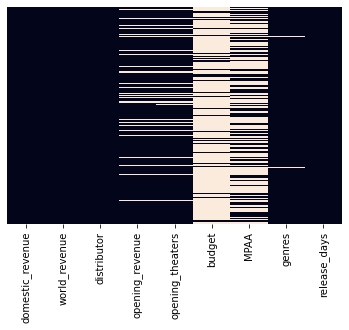

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [236]:
# As we can see that some features have most missing values, We are droping all such columns for now.

In [23]:
data = data.drop(['opening_theaters', 'budget', 'MPAA'], axis=1)

<AxesSubplot:>

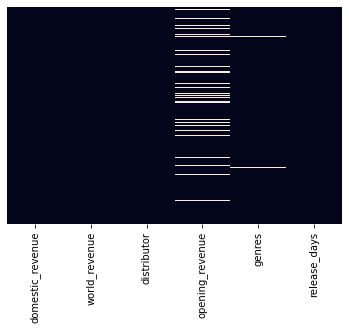

In [24]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

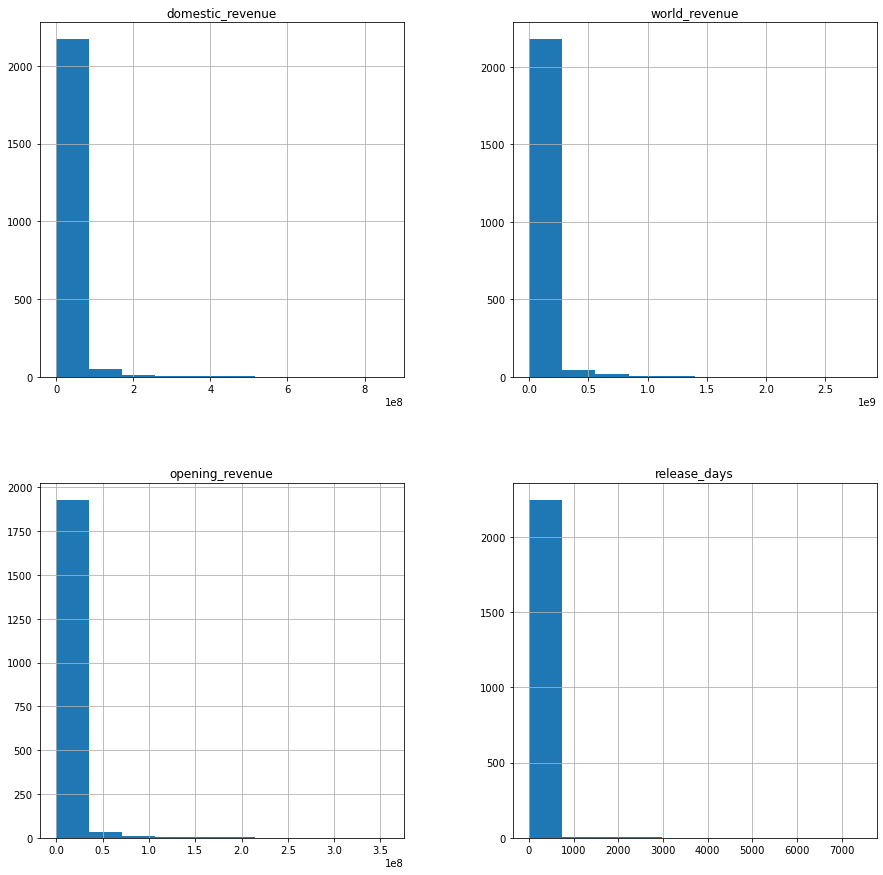

In [25]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,15))
plt.show()

In [237]:
# filling the missing values of opening revenue column with median.

In [26]:
data['opening_revenue'] = data['opening_revenue'].fillna((data['opening_revenue'].median()))

In [238]:
# Fill the missing values of genres column with mode.

In [27]:
data['genres'].fillna(data['genres'].mode()[0], inplace = True)

In [28]:
data.isnull().sum()

domestic_revenue    0
world_revenue       0
distributor         0
opening_revenue     0
genres              0
release_days        0
dtype: int64

In [ ]:
#  checking for the outliers.

C:\Users\vipin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vipin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vipin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vipin\anaconda3\lib\si

<AxesSubplot:>

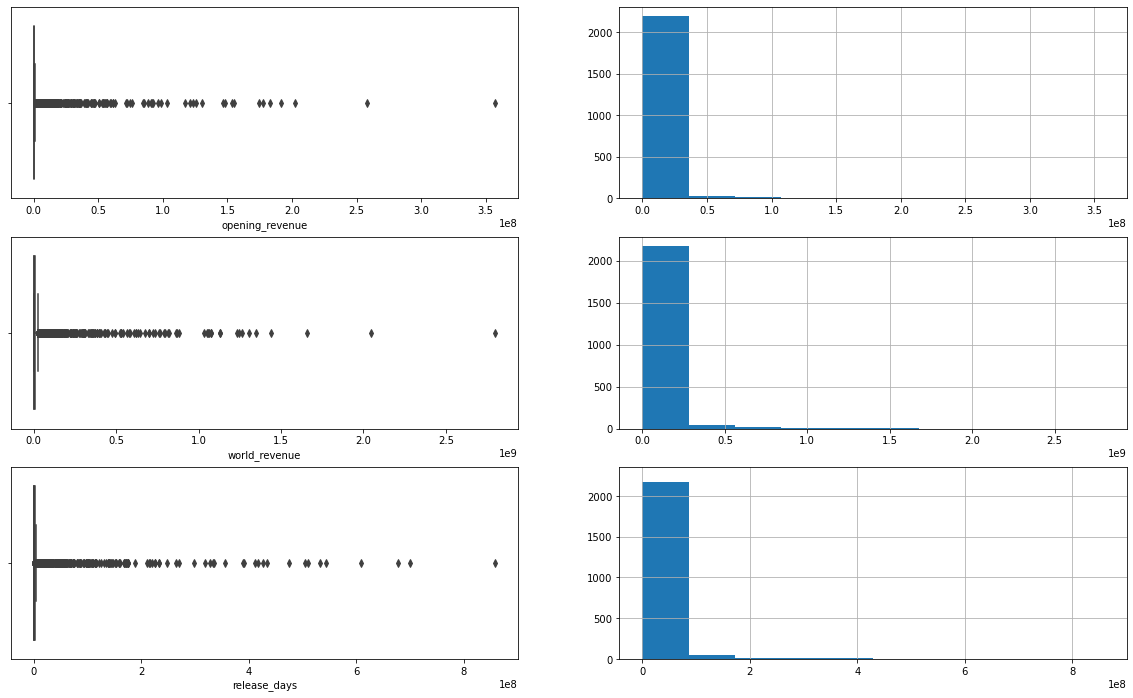

In [29]:
fig, ax = plt.subplots(3,2,figsize=(20, 12))
sns.boxplot(data['domestic_revenue'],data=data,ax=ax[2,0])
data['domestic_revenue'].hist(ax=ax[2,1])
sns.boxplot(data['world_revenue'],data=data,ax=ax[1,0])
data['world_revenue'].hist(ax=ax[1,1])
sns.boxplot(data['opening_revenue'],data=data,ax=ax[0,0])
data['opening_revenue'].hist(ax=ax[0,1])
sns.boxplot(data['release_days'],data=data,ax=ax[2,0])
data['release_days'].hist(ax=ax[2,1])

In [30]:
print('skewness value of domestic_revenue: ',data['domestic_revenue'].skew())
print('skewness value of world_revenue: ',data['world_revenue'].skew())
print('skewness value of opening_revenue: ',data['opening_revenue'].skew())
print('skewness value of release_days: ',data['release_days'].skew())

skewness value of domestic_revenue:  7.945380124394565
skewness value of world_revenue:  7.921797400815338
skewness value of opening_revenue:  9.185614770448241
skewness value of release_days:  15.469313963806206


#### The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [31]:
#droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘domestic_revenue’
#variable.
Q01 = data['domestic_revenue'].quantile(0.25)
Q03 = data['domestic_revenue'].quantile(0.75)
IQR0 = Q03 - Q01
whisker_width0 = 1.5
lower_whisker0 = Q01 -(whisker_width0*IQR0)
upper_whisker0 = Q03 + (whisker_width0*IQR0)
data['domestic_revenue']=np.where(data['domestic_revenue']>upper_whisker0,upper_whisker0,np.where(data['domestic_revenue']<lower_whisker0,lower_whisker0,data['domestic_revenue']))


#droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘world_revenue’
#variable.
Q11 = data['world_revenue'].quantile(0.25)
Q13 = data['world_revenue'].quantile(0.75)
IQR1 = Q13 - Q11
whisker_width1 = 1.5
lower_whisker1 = Q11 -(whisker_width1*IQR1)
upper_whisker1 = Q13 + (whisker_width1*IQR1)
data['world_revenue']=np.where(data['world_revenue']>upper_whisker1,upper_whisker1,np.where(data['world_revenue']<lower_whisker1,lower_whisker1,data['world_revenue']))


#droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘opening_revenue’
#variable.
Q21 = data['opening_revenue'].quantile(0.25)
Q23 = data['opening_revenue'].quantile(0.75)
IQR2 = Q23 - Q21
whisker_width2 = 1.5
lower_whisker2 = Q21 -(whisker_width2*IQR2)
upper_whisker2 = Q23 + (whisker_width2*IQR2)
data['opening_revenue']=np.where(data['opening_revenue']>upper_whisker2,upper_whisker2,np.where(data['opening_revenue']<lower_whisker2,lower_whisker2,data['opening_revenue']))


#droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘release_days’
#variable.
Q31 = data['release_days'].quantile(0.25)
Q33 = data['release_days'].quantile(0.75)
IQR3 = Q33 - Q31
whisker_width3 = 1.5
lower_whisker3 = Q31 -(whisker_width3*IQR3)
upper_whisker3 = Q33 + (whisker_width3*IQR3)
data['release_days']=np.where(data['release_days']>upper_whisker3,upper_whisker3,np.where(data['release_days']<lower_whisker3,lower_whisker3,data['release_days']))

C:\Users\vipin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vipin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vipin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vipin\anaconda3\lib\si

<AxesSubplot:>

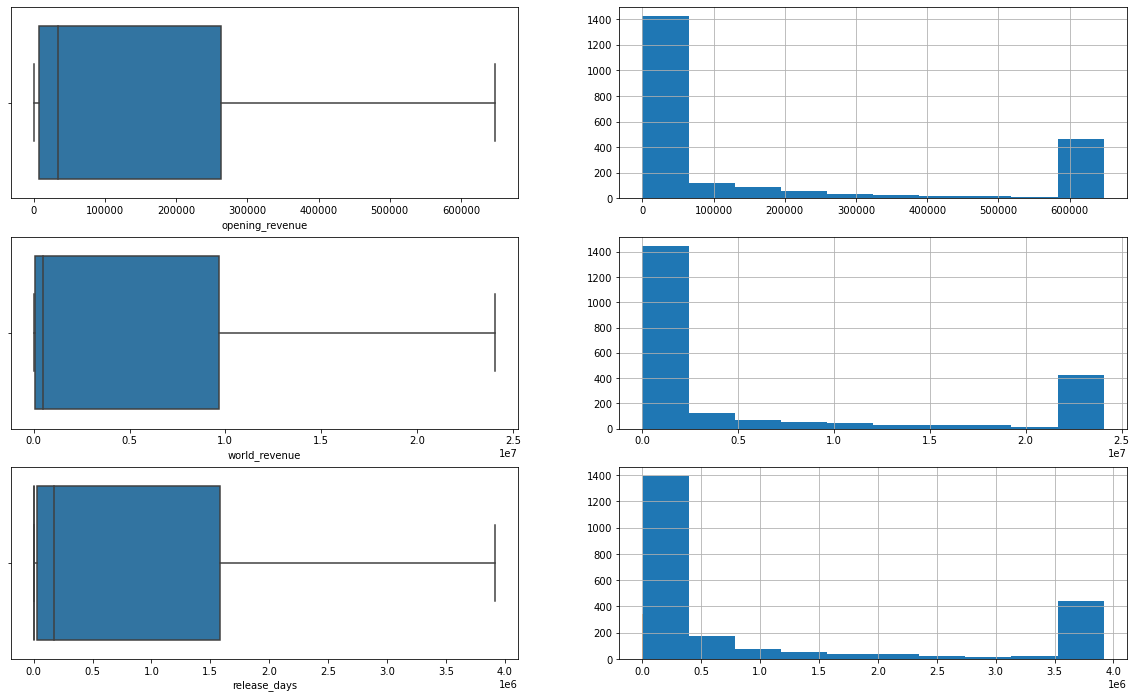

In [32]:
fig, ax = plt.subplots(3,2,figsize=(20, 12))
sns.boxplot(data['domestic_revenue'],data=data,ax=ax[2,0])
data['domestic_revenue'].hist(ax=ax[2,1])
sns.boxplot(data['world_revenue'],data=data,ax=ax[1,0])
data['world_revenue'].hist(ax=ax[1,1])
sns.boxplot(data['opening_revenue'],data=data,ax=ax[0,0])
data['opening_revenue'].hist(ax=ax[0,1])
sns.boxplot(data['release_days'],data=data,ax=ax[2,0])
data['release_days'].hist(ax=ax[2,1])

### ENCODING

#### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
lbl=label_en.fit_transform(data['genres'])

In [34]:
data=data.drop('genres',axis=1)
data['Genres']=lbl

In [35]:
#drop genres column and concatinate the df1(each genre) to the dataset
#df1=data['genres'].str.get_dummies(sep=',')
#df1.columns
#data=data.drop(['genres'],axis=1)
#data=pd.concat([data, df1], axis=1)

In [36]:
data.head()

,domestic_revenue,world_revenue,distributor,opening_revenue,release_days,Genres
624,124573.0,124573.0,Fathom Events,34298.5,337.0,526
531,5152.0,5152.0,Indican Pictures,997.0,123.0,99
1376,1343797.0,16758596.0,Sony Pictures Releasing,483681.0,242.0,315
983,32413.0,32413.0,in8 Releasing,28863.0,137.0,299
121,2263.0,68260.0,Vertical Entertainment,1430.0,263.0,527


<AxesSubplot:>

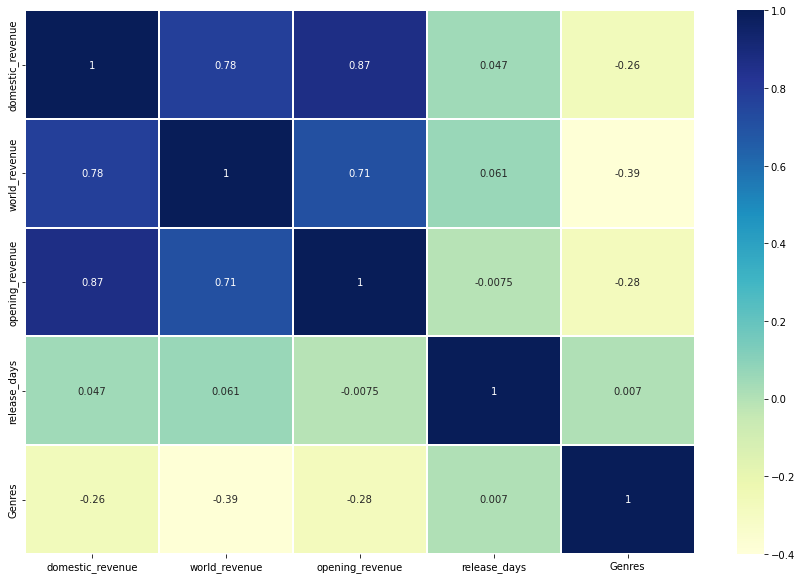

In [37]:
corrmatrix = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=1, annot=True, linewidths=0.2, cmap='YlGnBu')

In [38]:
X=data.drop(['world_revenue','distributor'], axis=1)
X.describe()

,domestic_revenue,opening_revenue,release_days,Genres
count,2.260000e+03,2260.000000,2260.000000,2260.000000
mean,1.053314e+06,179258.924447,227.952212,328.859735
std,1.523734e+06,253922.933828,114.739675,137.145620
min,1.470000e+02,108.000000,12.000000,0.000000
25%,2.601475e+04,7330.000000,130.000000,264.000000
50%,1.679640e+05,34298.500000,228.000000,388.000000
75%,1.582450e+06,263454.500000,311.000000,423.000000
max,3.917104e+06,647641.250000,582.500000,529.000000


In [39]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3
count,2260.000000,2260.000000,2260.000000,2260.000000
mean,0.918799,0.284409,0.007861,0.014092
std,0.149158,0.224255,0.021022,0.041374
min,0.006414,0.002687,0.000010,0.000000
25%,0.901920,0.130633,0.000114,0.000145
50%,0.982662,0.183200,0.001067,0.001779
75%,0.991052,0.425778,0.006273,0.010758
max,0.999996,0.999918,0.354151,0.919316


<br/>

### EXPLORATORY DATA ANALYSIS(EDA)

In [40]:
data

,domestic_revenue,world_revenue,distributor,opening_revenue,release_days,Genres
624,124573.000,124573.00,Fathom Events,34298.50,337.0,526
531,5152.000,5152.00,Indican Pictures,997.00,123.0,99
1376,1343797.000,16758596.00,Sony Pictures Releasing,483681.00,242.0,315
983,32413.000,32413.00,in8 Releasing,28863.00,137.0,299
121,2263.000,68260.00,Vertical Entertainment,1430.00,263.0,527
...,...,...,...,...,...,...
2568,3917104.125,24066016.25,Sony Pictures Releasing,647641.25,116.0,87
218,8998.000,8998.00,Parade Deck Films,8998.00,249.0,229
2645,3917104.125,24066016.25,Paramount Pictures,647641.25,346.0,58
1088,45777.000,68017.00,"Hammond Entertainment, LLC",18365.00,347.0,308


In [41]:
data.columns

Index(['domestic_revenue', 'world_revenue', 'distributor', 'opening_revenue',
       'release_days', 'Genres'],
      dtype='object')

In [42]:
#Feature Engineering
# Creating a new data frame containing mean value of world_revenue in different distributors
x=pd.DataFrame(data.groupby("distributor")['world_revenue'].mean().sort_values(ascending=False))
x

,world_revenue
distributor,
The H Collective,24066016.25
Ledafilms Entertainment Group,24066016.25
Studio 8,24066016.25
Capelight Pictures,24066016.25
TriStar Pictures,24066016.25
...,...
Smarthouse Creative / Distribber,3774.00
Uncork'd Entertainment,2900.00
Fun Academy Motion Pictures,2784.00


In [43]:
# Creating a new dataframe by merging data and x 

df = data.merge(x, on='distributor', how='left')
df.head()

,domestic_revenue,world_revenue_x,distributor,opening_revenue,release_days,Genres,world_revenue_y
0,124573.0,124573.0,Fathom Events,34298.5,337.0,526,1.029069e+06
1,5152.0,5152.0,Indican Pictures,997.0,123.0,99,4.146163e+04
2,1343797.0,16758596.0,Sony Pictures Releasing,483681.0,242.0,315,1.834059e+07
3,32413.0,32413.0,in8 Releasing,28863.0,137.0,299,9.698900e+04
4,2263.0,68260.0,Vertical Entertainment,1430.0,263.0,527,1.403547e+06


In [44]:
# Assigning mean value of world revenue to dataset as a new column

data['Mean_world_revenue']=df['world_revenue_y']
data.head()

,domestic_revenue,world_revenue,distributor,opening_revenue,release_days,Genres,Mean_world_revenue
624,124573.0,124573.0,Fathom Events,34298.5,337.0,526,4.200532e+06
531,5152.0,5152.0,Indican Pictures,997.0,123.0,99,2.290965e+07
1376,1343797.0,16758596.0,Sony Pictures Releasing,483681.0,242.0,315,8.428190e+06
983,32413.0,32413.0,in8 Releasing,28863.0,137.0,299,1.029069e+06
121,2263.0,68260.0,Vertical Entertainment,1430.0,263.0,527,1.908856e+06


In [45]:
data.isna().sum()


domestic_revenue        0
world_revenue           0
distributor             0
opening_revenue         0
release_days            0
Genres                  0
Mean_world_revenue    361
dtype: int64

In [46]:
data['Mean_world_revenue'] = data['Mean_world_revenue'].fillna((data['Mean_world_revenue'].median()))
data.isna().sum()

domestic_revenue      0
world_revenue         0
distributor           0
opening_revenue       0
release_days          0
Genres                0
Mean_world_revenue    0
dtype: int64

In [47]:
corr = data[['opening_revenue','world_revenue','domestic_revenue']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\vipin\AppData\Local\Temp/ipykernel_13884/1429544484.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,opening_revenue,world_revenue,domestic_revenue
opening_revenue,1.00,0.71,0.87
world_revenue,0.71,1.00,0.78
domestic_revenue,0.87,0.78,1.00


  Strong correlation between all the revenues

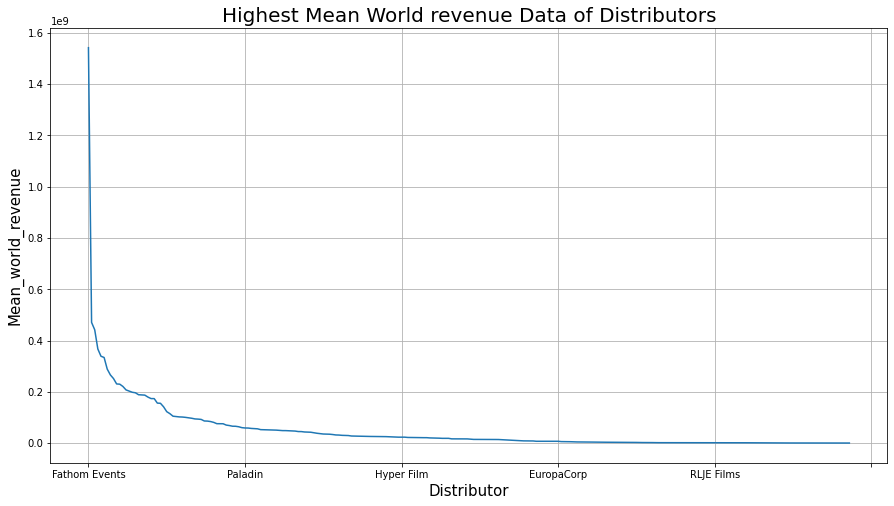

In [48]:
plt.figure(figsize=(15,8))
data.groupby(['distributor'])['Mean_world_revenue'].sum().sort_values(ascending=False).plot()

plt.grid()
plt.xlabel("Distributor",fontsize=15)
plt.ylabel("Mean_world_revenue",fontsize=15)
plt.title('Highest Mean World revenue Data of Distributors',fontsize=20);

Insight:  This plot represents the analysis of highest Mean world Revenue of distibutors. From here , we can infer that Fathom Events received the highest Mean world Revenue  

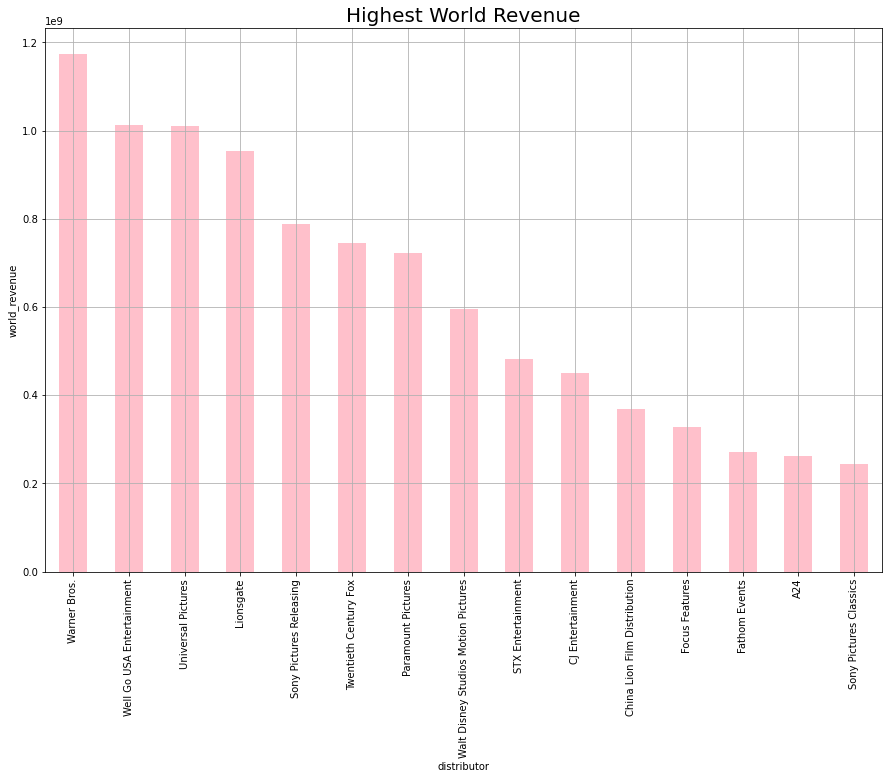

In [49]:
#Highest
plt.figure(figsize=(15,10))
data.groupby(['distributor'])['world_revenue'].sum().sort_values(ascending=False).head(15).plot(kind='bar', color = 'pink')
plt.ylabel('world_revenue')
plt.title('Highest World Revenue',fontsize=20)
plt.grid();

Insight: This plot represents the analysis of highest world Revenue of distibutors. From here , we can infer that Warner Bros received the highest Mean world Revenue

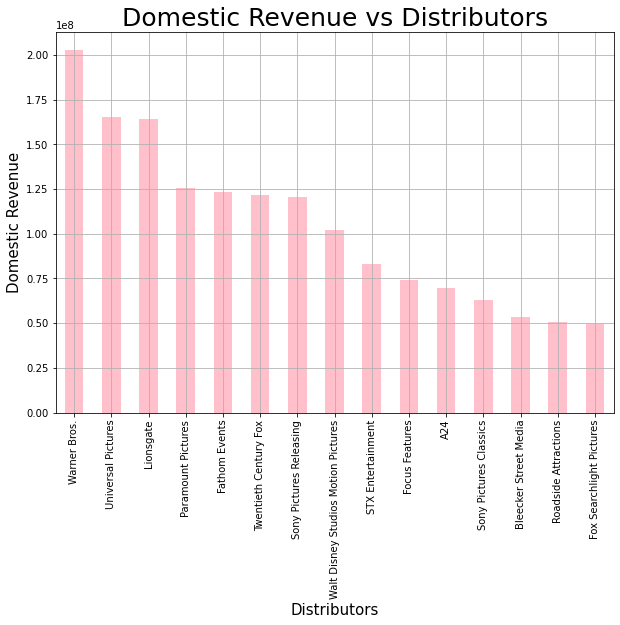

In [50]:
plt.figure(figsize=(10,7))
data.groupby(['distributor'])['domestic_revenue'].sum().sort_values(ascending=False).head(15).plot(kind='bar', color = 'pink')
plt.xlabel('Distributors',fontsize=15)
plt.ylabel('Domestic Revenue',fontsize=15)
plt.title('Domestic Revenue vs Distributors',fontsize=25)
plt.grid()
plt.show();

Insight: This plot represents the analysis of highest domestic Revenue of distibutors. From here , we can infer that Warner Bros received the highest domestic Revenue

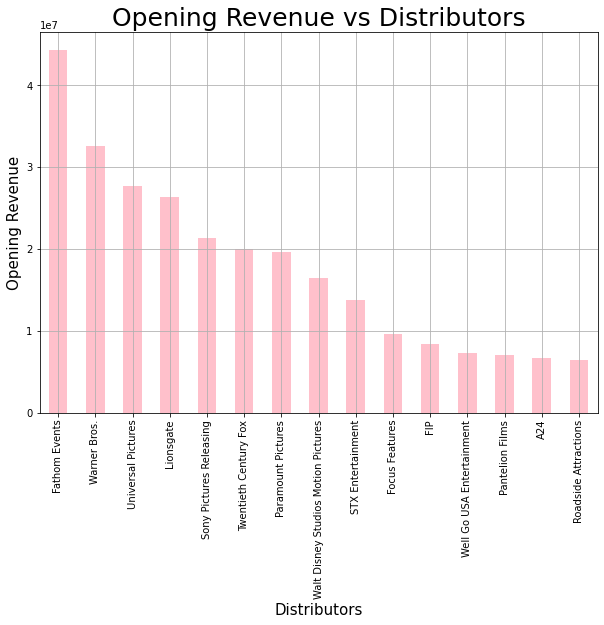

In [51]:
plt.figure(figsize=(10,7))
data.groupby(['distributor'])['opening_revenue'].sum().sort_values(ascending=False).head(15).plot(kind='bar', color = 'pink')
plt.xlabel('Distributors',fontsize=15)
plt.ylabel('Opening Revenue',fontsize=15)
plt.title('Opening Revenue vs Distributors',fontsize=25)
plt.grid()
plt.show();


Insight: This plot represents the analysis of highest opening Revenue of distibutors. From here , we can infer that Fathom Events received the highest opening Revenue

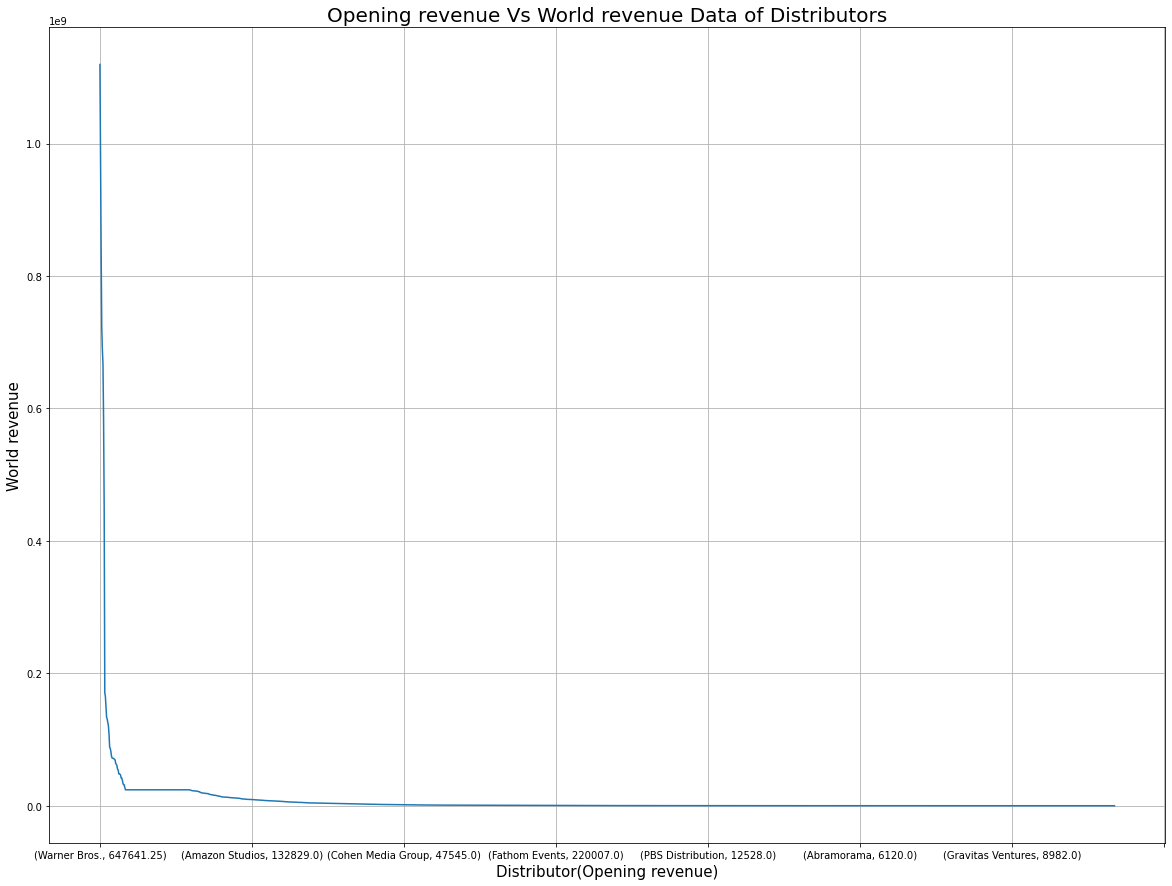

In [52]:
plt.figure(figsize=(20,15))
data.groupby(['distributor','opening_revenue'])['world_revenue'].sum().sort_values(ascending=False).plot()

plt.grid()
plt.xlabel("Distributor(Opening revenue)",fontsize=15)
plt.ylabel("World revenue",fontsize=15)
plt.title('Opening revenue Vs World revenue Data of Distributors',fontsize=20);

Insight: This plot represents the analysis of the opening revenue Vs World revenue Data of Distributors. From here , we can infer that Warner Bros received the highest opening Revenue and world revenue

In [53]:
n = len(pd.unique(data['distributor']))
n

244

In [54]:
df_1=df.sort_values(by=['opening_revenue','world_revenue_x','domestic_revenue'],ascending=False)
df_2=df_1.head(50)
df_2

,domestic_revenue,world_revenue_x,distributor,opening_revenue,release_days,Genres,world_revenue_y
6,3917104.125,24066016.25,Warner Bros.,647641.25,347.0,110,2.173989e+07
14,3917104.125,24066016.25,STX Entertainment,647641.25,81.0,97,2.093503e+07
28,3917104.125,24066016.25,Entertainment Studios Motion Pictures,647641.25,199.0,202,1.344952e+07
29,3917104.125,24066016.25,Entertainment Studios Motion Pictures,647641.25,179.0,202,1.344952e+07
39,3917104.125,24066016.25,Sony Pictures Releasing,647641.25,81.0,275,1.834059e+07
48,3917104.125,24066016.25,Twentieth Century Fox,647641.25,318.0,433,2.406602e+07
50,3917104.125,24066016.25,Universal Pictures,647641.25,270.0,317,2.294634e+07
51,3917104.125,24066016.25,Universal Pictures,647641.25,339.0,173,2.294634e+07
52,3917104.125,24066016.25,Sony Pictures Releasing,647641.25,396.0,193,1.834059e+07
63,3917104.125,24066016.25,Lionsgate,647641.25,347.0,299,2.027439e+07


<Figure size 720x144 with 0 Axes>

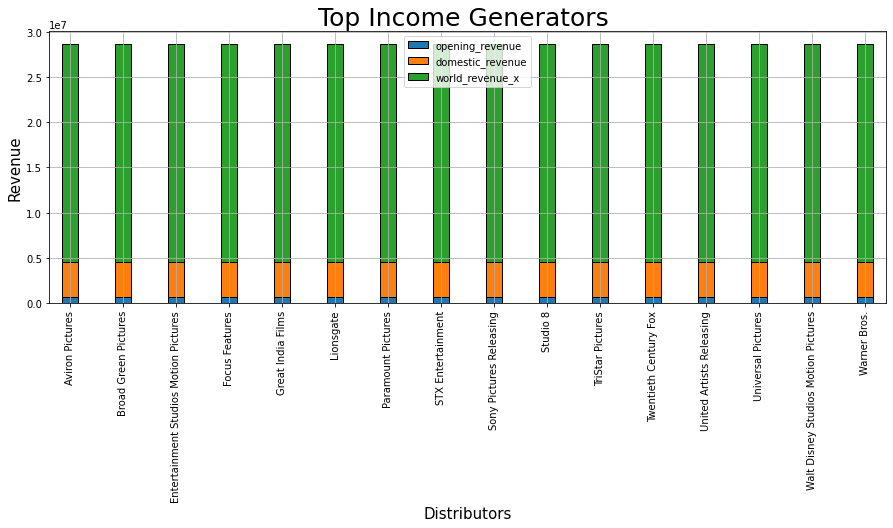

In [55]:
#plotting Top revenue receivers
plt.figure(figsize=(10,2))
df_2[['distributor', 'opening_revenue', 'domestic_revenue','world_revenue_x']].groupby('distributor').mean().sort_values('world_revenue_x').plot.bar(width=0.3,edgecolor='k',align='center',stacked=True,figsize=(15,5));
plt.xlabel('Distributors',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('Top Income Generators ',fontsize=25)
plt.grid();

Insight:  The above graph shows the distributors who received topmost revenues from all the divisions(opening_revenue', 'domestic_revenue','world_revenue) which shows their blockbuster box office performance was excellent

In [56]:
df_2=df.sort_values(by=['opening_revenue','world_revenue_x','domestic_revenue'],ascending=True)
df2=df_2.head(50)
df2

,domestic_revenue,world_revenue_x,distributor,opening_revenue,release_days,Genres,world_revenue_y
1391,147.0,22443.00,The Film Arcade,108.0,116.0,505,8.690043e+04
2082,5129.0,5129.00,Driving With Our Eyes Shut,112.0,582.5,76,6.378333e+03
1249,17099.0,17099.00,Hey Jude Productions,151.0,402.0,420,1.709900e+04
1855,3040.0,118451.00,Monterey Media,160.0,283.0,423,7.654050e+04
2124,1227.0,1227.00,Indican Pictures,185.0,221.0,343,4.146163e+04
1783,2032.0,18459.00,Arrow Films,249.0,150.0,484,1.557363e+05
190,3292.0,26338.00,Entertainment One,274.0,95.0,482,3.311036e+06
1396,2255.0,2255.00,Artsploitation Films,280.0,129.0,510,2.255000e+03
16,422.0,3945729.00,Magnolia Pictures,294.0,185.0,482,2.314702e+06
754,528.0,528.00,Magnolia Pictures,299.0,235.0,130,2.314702e+06


<Figure size 1080x360 with 0 Axes>

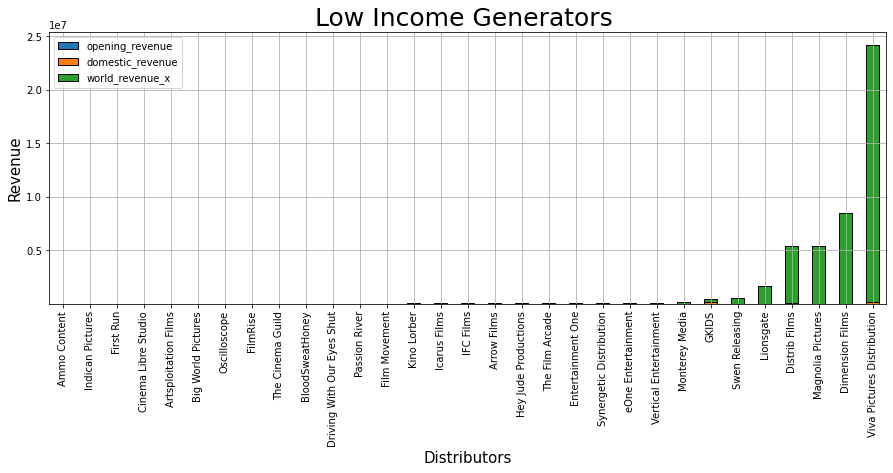

In [57]:
#plotting low income generators
plt.figure(figsize=(15,5))
df2[['distributor', 'opening_revenue', 'domestic_revenue','world_revenue_x']].groupby('distributor').mean().sort_values('world_revenue_x').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(15,5));
plt.xlabel('Distributors',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('Low Income Generators ',fontsize=25)
plt.grid();

Insight:  The above graph shows the distributors who received low income from all the divisions(opening_revenue', 'domestic_revenue','world_revenue). Some distributors(Ammo content, Indican pictures,First Run etc)  can't even collect their domestic revenue. 

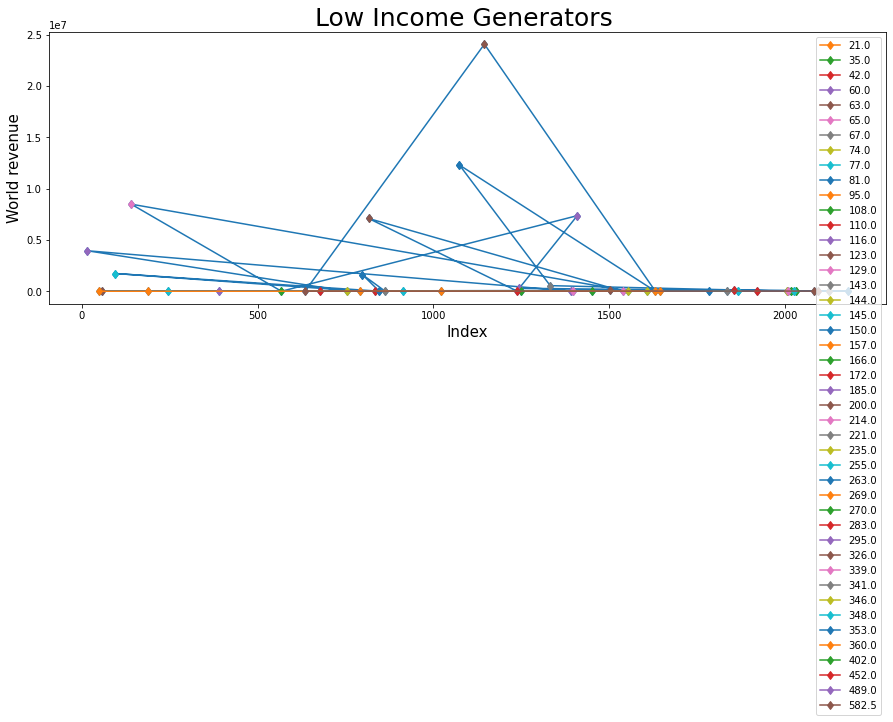

In [58]:
#Line plot- univariate data visualization
plt.figure(figsize=(15,5))
plt.xlabel('Index',fontsize=15)
plt.ylabel('World revenue',fontsize=15)
plt.title('Low Income Generators ',fontsize=25)
plt.plot(df2.index,df2['world_revenue_x'],markevery = 1, marker = 'd')
for name, group in df2.groupby('release_days'):
    plt.plot(group.index,group['world_revenue_x'],label = name, markevery = 1, marker = 'd')
plt.legend()
plt.show()

Insight: The above line plot shows the distributors who received low income only on the basis of release_days column. Here we can see that income decreases as number of release days dereases and viceversa.

### Modelling


In [59]:
data

,domestic_revenue,world_revenue,distributor,opening_revenue,release_days,Genres,Mean_world_revenue
624,124573.000,124573.00,Fathom Events,34298.50,337.0,526,4.200532e+06
531,5152.000,5152.00,Indican Pictures,997.00,123.0,99,2.290965e+07
1376,1343797.000,16758596.00,Sony Pictures Releasing,483681.00,242.0,315,8.428190e+06
983,32413.000,32413.00,in8 Releasing,28863.00,137.0,299,1.029069e+06
121,2263.000,68260.00,Vertical Entertainment,1430.00,263.0,527,1.908856e+06
...,...,...,...,...,...,...,...
2568,3917104.125,24066016.25,Sony Pictures Releasing,647641.25,116.0,87,1.403547e+06
218,8998.000,8998.00,Parade Deck Films,8998.00,249.0,229,1.908856e+06
2645,3917104.125,24066016.25,Paramount Pictures,647641.25,346.0,58,1.403547e+06
1088,45777.000,68017.00,"Hammond Entertainment, LLC",18365.00,347.0,308,1.415771e+07


In [256]:
ld2=label_en.fit_transform(data['distributor'])

In [257]:
data=data.drop('distributor',axis=1)
data


,domestic_revenue,world_revenue,opening_revenue,release_days,Genres,Mean_world_revenue
624,124573.000,124573,34298.50,337.0,526,4.200532e+06
531,5152.000,5152,997.00,123.0,99,2.290965e+07
1376,1343797.000,16758596,483681.00,242.0,315,8.428190e+06
983,32413.000,32413,28863.00,137.0,299,1.029069e+06
121,2263.000,68260,1430.00,263.0,527,1.908856e+06
...,...,...,...,...,...,...
2568,3917104.125,24066016,647641.25,116.0,87,1.403547e+06
218,8998.000,8998,8998.00,249.0,229,1.908856e+06
2645,3917104.125,24066016,647641.25,346.0,58,1.403547e+06
1088,45777.000,68017,18365.00,347.0,308,1.415771e+07


In [ ]:
data['distributor']=ld2

In [261]:
x=data.drop(['world_revenue'],axis=1)
y=pd.DataFrame(data['world_revenue'])

In [255]:
data

,domestic_revenue,world_revenue,opening_revenue,release_days,Genres,Mean_world_revenue,distributor
624,124573.000,124573,34298.50,337.0,526,4.200532e+06,83
531,5152.000,5152,997.00,123.0,99,2.290965e+07,125
1376,1343797.000,16758596,483681.00,242.0,315,8.428190e+06,195
983,32413.000,32413,28863.00,137.0,299,1.029069e+06,243
121,2263.000,68260,1430.00,263.0,527,1.908856e+06,230
...,...,...,...,...,...,...,...
2568,3917104.125,24066016,647641.25,116.0,87,1.403547e+06,195
218,8998.000,8998,8998.00,249.0,229,1.908856e+06,165
2645,3917104.125,24066016,647641.25,346.0,58,1.403547e+06,167
1088,45777.000,68017,18365.00,347.0,308,1.415771e+07,111


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

#### Random Forest Regressor.

In [252]:
data


,domestic_revenue,world_revenue,opening_revenue,release_days,Genres,Mean_world_revenue,distributor
624,124573.000,124573,34298.50,337.0,526,4.200532e+06,83
531,5152.000,5152,997.00,123.0,99,2.290965e+07,125
1376,1343797.000,16758596,483681.00,242.0,315,8.428190e+06,195
983,32413.000,32413,28863.00,137.0,299,1.029069e+06,243
121,2263.000,68260,1430.00,263.0,527,1.908856e+06,230
...,...,...,...,...,...,...,...
2568,3917104.125,24066016,647641.25,116.0,87,1.403547e+06,195
218,8998.000,8998,8998.00,249.0,229,1.908856e+06,165
2645,3917104.125,24066016,647641.25,346.0,58,1.403547e+06,167
1088,45777.000,68017,18365.00,347.0,308,1.415771e+07,111


In [245]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train.values.ravel())
y_pred=rf.predict(x_test)

In [246]:
from sklearn.metrics import accuracy_score,r2_score

In [247]:
print('Accuracy is:', r2_score(y_test,y_pred))

Accuracy is: 0.72783582396638


In [254]:
print(rf.predict([[124573.000, 0, 34298.50, 337.0,526,83]]))

[5257556.37]


C:\Users\vipin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### KNN

In [68]:
data['world_revenue']=data['world_revenue'].apply(np.int32)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 624 to 984
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   domestic_revenue    2260 non-null   float64
 1   world_revenue       2260 non-null   int32  
 2   opening_revenue     2260 non-null   float64
 3   release_days        2260 non-null   float64
 4   Genres              2260 non-null   int32  
 5   Mean_world_revenue  2260 non-null   float64
 6   distributor         2260 non-null   int32  
dtypes: float64(4), int32(3)
memory usage: 114.8 KB


In [70]:
x=data.drop(['world_revenue'],axis=1)
y=pd.DataFrame(data['world_revenue'])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,20)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

C:\Users\vipin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vipin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vipin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vipin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [74]:
acc_values

[0.1415929203539823,
 0.14896755162241887,
 0.15191740412979352,
 0.15191740412979352,
 0.15486725663716813,
 0.15781710914454278,
 0.15781710914454278,
 0.1607669616519174,
 0.16224188790560473,
 0.16519174041297935,
 0.1696165191740413,
 0.17256637168141592,
 0.17404129793510326,
 0.17551622418879056,
 0.17699115044247787,
 0.17846607669616518,
 0.17846607669616518]

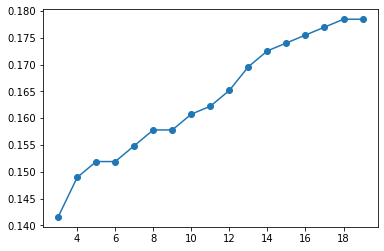

In [75]:
plt.plot(neighbors, acc_values,'o-')#graph showing accuracy against knn

Insight:Accuracy is maximum at 20.

In [76]:
classifier=KNeighborsClassifier(n_neighbors=20, metric='minkowski')
classifier.fit(x_train,y_train.values.ravel())
y_pred=classifier.predict(x_test)

In [77]:
print('Accuracy is:', accuracy_score(y_test,y_pred))

Accuracy is: 0.17846607669616518


Decision Tree Classifier.

In [120]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train.values.ravel())
y_pred=dt_model.predict(x_test)

In [121]:
f1_score(y_test,y_pred,average='micro')

0.13716814159292035

Conclusion: Random forest regressor has the highest accuracy, so we choose random forest regressor as our machine learning model to predict world revenue.

### Fine Tuning

In [161]:
# available hyperparameters

from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [178]:
df.shape

(2260, 7)

In [193]:
rf.fit(x_train,y_train.values.ravel())

RandomForestRegressor()

In [218]:
rft = RandomForestRegressor(n_estimators=50,oob_score = True,max_depth=10,random_state=42,criterion='squared_error',max_features = 'sqrt',bootstrap = True)

In [219]:
rft.fit(x,y.values.ravel())

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=50,
                      oob_score=True, random_state=42)

In [220]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1405912.6421861013
Mean Squared Error: 5984967137564.164
Root Mean Squared Error: 2446419.248118393


### Conclusion:

#### We have created a model based on RFR to predict the box office revenue for the upcoming movies.
#### Random Forest regressor showed a better accuracy in terms of r2 score among other regression techniques
<br/>
<br/>